# Hypothesis Testing and Model Selection in Bayesian Statistics (with example of a Normal Distribution)

### Pratical demonstration of hypothesis testing and model selection in Bayesian statistics for the CNM coursework in SINP during Fall 2022 by Arunava Mukherjee (19 Spetember 2022, class 5)

#### 
 *  This program is free software; you can redistribute it and/or modify
 *  it under the terms of the GNU General Public License as published by
 *  the Free Software Foundation; either version 2 of the License, or
 *  (at your option) any later version.
 *
 *  This program is distributed in the hope that it will be useful,
 *  but WITHOUT ANY WARRANTY; without even the implied warranty of
 *  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 *  GNU General Public License for more details.
 *
 *  You should have received a copy of the GNU General Public License
 *  along with with program; see the file COPYING. If not, write to the
 *  Free Software Foundation, Inc., 59 Temple Place, Suite 330, Boston,
 *  MA  02111-1307  USA.

**(c) Arunava Mukherjee, 2022**

In [1]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt

#### Define probability of Gaussian distribution

In [2]:
def Prob_Gaussian(mean, var, theta):
    prob = norm(mean, var).pdf(theta)
    
    return prob

### Define theoretical likelihood model for the hypothesis

In [3]:
mean, var = 120.0, 10.0

#### define the observed value for the data

In [4]:
data = 114.6

In [5]:
Prob_Gaussian(mean, var, data)

0.03448180014393333

In [6]:
# save it as the true value
theta_true = data

### Define the likelihood function for different parameter ($\theta$) values

In [7]:
num_pts = 11    # (change this as needed!)
print('Number of points are:', num_pts)

Number of points are: 11


In [8]:
theta_arr = np.linspace(110.0, 120.0, num_pts)
print(r'theta values are: ', theta_arr)

theta values are:  [110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.]


### Define prior values for all the hypotheses ($P(\theta)$)

### Set tesing prior distribution

In [9]:
# use prior suitable for hypothesis testing
prior_arr = np.zeros_like(theta_arr) + (0.5/(len(theta_arr)-1))
prior_arr[-1] = 0.5    # testing prior

# use flat prior
#prior_arr = np.zeros_like(theta_arr) + (1.0/len(theta_arr))

print ('prior_arr :', prior_arr)

prior_arr : [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.5 ]


#### check the sum of all prior values

In [10]:
sum_prior = np.sum(prior_arr)
print ('sum of all the prior values =', sum_prior)

sum of all the prior values = 1.0


#### plot the prior distribution

Text(0, 0.5, '$P(\\theta)$')

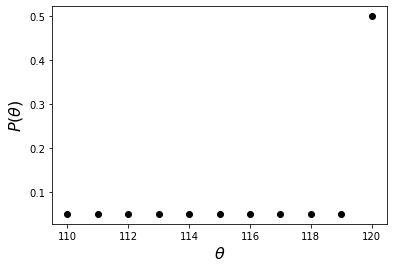

In [11]:
plt.plot(theta_arr, prior_arr, 'ko')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta)$', fontsize=16)

### Define likelihood for all the hypotheses ($P(D | \theta)$)

In [12]:
likelihood_1sample_arr = np.zeros_like(theta_arr)    # initialize
i = 0
for theta in theta_arr:
    likelihood_1sample_arr[i] = Prob_Gaussian(theta, var, data)
    i += 1
    
print ('likelihood distribution for 1 sample:', likelihood_1sample_arr)

likelihood distribution for 1 sample: [0.03588903 0.03739106 0.03856834 0.03938684 0.03982248 0.03986233
 0.03950517 0.03876166 0.03765372 0.03621349 0.0344818 ]


#### Now multiply the likelihood for `N` samples

In [13]:
num_sample = 100    # (*** change it to see the effect ***)

log_likelihood_1sample_arr = np.log(likelihood_1sample_arr)

log_likelihood_arr = 1.0   # initialization

for i_sample in range(num_sample):
    log_likelihood_arr += log_likelihood_1sample_arr
    
likelihood_arr = np.exp(log_likelihood_arr)
likelihood_arr = (likelihood_arr/np.max(likelihood_arr))

print ('likelihood distribution for N-samples:', likelihood_arr)

likelihood distribution for N-samples: [2.75364493e-05 1.66155727e-03 3.68831674e-02 3.01194212e-01
 9.04837418e-01 1.00000000e+00 4.06569660e-01 6.08100626e-02
 3.34596546e-03 6.77287365e-05 5.04347663e-07]


#### check the sum of all likelihood values

In [14]:
sum_likelihood = np.sum(likelihood_arr)
print ('sum of all the likelihood values =', sum_likelihood)

sum of all the likelihood values = 2.715397811979129


#### plot the likelihood distribution

Text(0, 0.5, '$P(D | \\theta)$')

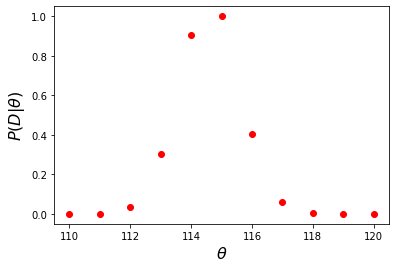

In [15]:
plt.plot(theta_arr, likelihood_arr, 'ro')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(D | \theta)$', fontsize=16)

### Define unnormalized posterior values ($h_i$) for all the hypotheses ($P(D | \theta)$)

In [16]:
h_arr = (prior_arr * likelihood_arr)
#print ('Array of unnormalized posterior values (h_i) :', h_arr)

#### check the sum of all unnormalized posterior ($h_i = h(\theta)$) values

In [17]:
sum_h = np.sum(h_arr)
print ('sum of all the unnormalized posterior values =', sum_h)

sum of all the unnormalized posterior values = 0.13577011755540463


#### plot the unnormalized posterior ($h_i = h(\theta)$) distribution

No handles with labels found to put in legend.


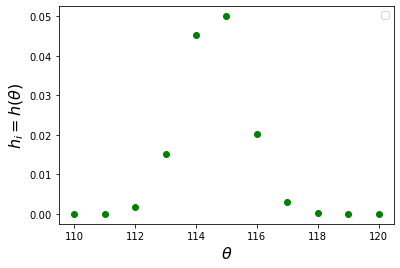

In [18]:
plt.plot(theta_arr, h_arr, 'go')
#plt.axvline(x = theta_true, color='k', label='Observed value')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$h_i = h(\theta)$', fontsize=16)
plt.legend()

### Define posterior values ($P(\theta | D)$) for all the hypotheses

In [19]:
posterior_arr = (h_arr/sum_h)
print ('array of posterior values :', posterior_arr)

array of posterior values : [1.01408358e-05 6.11900948e-04 1.35829474e-02 1.10920657e-01
 3.33224068e-01 3.68269549e-01 1.49727225e-01 2.23944944e-02
 1.23221719e-03 2.49424313e-05 1.85735886e-06]


### get the posterior probability for the hypotheses ($H_0$, $H_1$)

In [20]:
posterior_H0 = posterior_arr[-1]
posterior_H1 = np.sum(posterior_arr[:-1])

#### check the sum of all posterior values ($P(\theta | D)$) for all the hypotheses

In [21]:
sum_posterior = np.sum(posterior_arr)
print ('sum of all the posterior values =', sum_posterior)

sum of all the posterior values = 0.9999999999999999


#### plot the posterior ($P(\theta | D)$) distribution

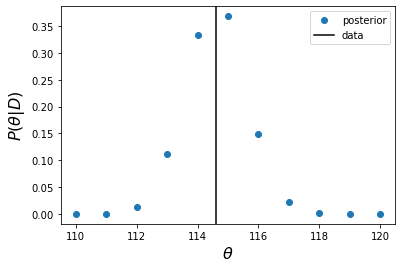

In [22]:
plt.plot(theta_arr, posterior_arr, 'o', label='posterior')
#plt.plot(theta_arr, prior_arr, 'kx', label='prior')    # check prior distribution
plt.axvline(x = theta_true, color='k', label='data')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta | D)$', fontsize=16)
plt.legend()

### Check the data used for this problem: 
#### `N` : Number of samples, `data` : mean of the distribution

In [23]:
print ('Number of samples (N) = %d, and the mean of sample (data) = %g'%(num_sample, data))

Number of samples (N) = 100, and the mean of sample (data) = 114.6


In [24]:
print ('Probability of null hypothesis being correct (i.e., theta = %g) P(H0) = %g'%(mean, posterior_H0))

Probability of null hypothesis being correct (i.e., theta = 120) P(H0) = 1.85736e-06


In [25]:
print ('Probability of alternate hypothesis being correct (i.e., theta < %g) P(H1) = %12.10g'%(mean, posterior_H1))

Probability of alternate hypothesis being correct (i.e., theta < 120) P(H1) = 0.9999981426


### Estimate Odds-ratio

#### Compute posterior odds for (H0/H1)

In [26]:
OddsRatio_H1overH0 = (posterior_H1/posterior_H0)
print ('Odds-ratio for (H0/H1) =', OddsRatio_H1overH0)

Odds-ratio for (H0/H1) = 538397.9165892182


#### compute prior odds

In [27]:
prior_H0 = prior_arr[-1]
prior_H1 = np.sum(prior_arr[:-1])

In [28]:
priorOdds_H0_H1 = (prior_H0/prior_H1)
print ('Prior odds for (H0/H1) =', priorOdds_H0_H1)

Prior odds for (H0/H1) = 1.0


### Compute Bayes' factor

#### note that likelihood of $H_0$ imples marginal likelihood of all values of theta consistent with the hypothesis $H_0$

In [29]:
likelihood_H0 = likelihood_arr[-1]
likelihood_H1 = np.sum(prior_arr[:-1] * likelihood_arr[:-1])/np.sum(prior_arr[:-1])

In [30]:
BayesFactor_H1overH0 = (likelihood_H1/likelihood_H0)
print ('Bayes factor for (H1/H0) =', BayesFactor_H1overH0)

Bayes factor for (H1/H0) = 538397.9165892183
